In [1]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb

### upload data

In [52]:
norm_data = pd.read_csv('../data/normalized_expr_mat.csv', index_col=0)

# %store norm_data

In [53]:
labels = pd.read_csv('../data/cell_type.csv', index_col=0)
# labels.type.unique().tolist()

In [54]:
norm_data = norm_data.join(labels.type)

In [55]:
X = norm_data.iloc[:,:-1] # data
y = norm_data.iloc[:,-1:] # labels

Train test split

In [56]:
from sklearn.model_selection import train_test_split

split: 60% test, 20% train, 20% validation

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### Model training

In [58]:
len(labels.type.unique())

15

In [78]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent',
    loss_function='MultiClass'
)

In [79]:
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    logging_level='Verbose',  # text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.109802
0:	learn: 2.3618134	test: 2.3671718	best: 2.3671718 (0)	total: 7.75s	remaining: 2h 9m 5s
1:	learn: 2.2179267	test: 2.2122243	best: 2.2122243 (1)	total: 15.4s	remaining: 2h 8m 26s
2:	learn: 2.1104552	test: 2.1089028	best: 2.1089028 (2)	total: 23.2s	remaining: 2h 8m 35s
3:	learn: 1.9657983	test: 1.9715592	best: 1.9715592 (3)	total: 30.4s	remaining: 2h 6m 19s
4:	learn: 1.8634131	test: 1.8762565	best: 1.8762565 (4)	total: 37.7s	remaining: 2h 4m 54s
5:	learn: 1.7736996	test: 1.7943101	best: 1.7943101 (5)	total: 45.8s	remaining: 2h 6m 30s
6:	learn: 1.6597203	test: 1.6781721	best: 1.6781721 (6)	total: 52.4s	remaining: 2h 3m 47s
7:	learn: 1.6004168	test: 1.6238022	best: 1.6238022 (7)	total: 58.4s	remaining: 2h 37s
8:	learn: 1.5348972	test: 1.5612906	best: 1.5612906 (8)	total: 1m 4s	remaining: 1h 58m 18s
9:	learn: 1.4850401	test: 1.5157158	best: 1.5157158 (9)	total: 1m 11s	remaining: 1h 57m 20s
10:	learn: 1.4423099	test: 1.4784427	best: 1.4784427 (10)	total: 1m 19s

In [90]:
%store model

Stored 'model' (CatBoostClassifier)


In [14]:
%store -r model

### Model Cross-Validation - To Do

In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

### Predict - Applying the Model

In [91]:
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)
print(predictions[:10])
print(predictions_probs[:10])

[['1-1']
 ['1-1']
 ['MG']
 ['2-4']
 ['5-6']
 ['1-1']
 ['1-2']
 ['1-2']
 ['1-2']
 ['1-2']]
[[9.26827158e-01 6.26296363e-03 8.62555004e-04 1.28674175e-03
  1.20281796e-03 8.28062585e-04 2.81051408e-04 6.48605933e-04
  4.25003095e-03 2.45210085e-04 3.42864350e-04 2.39471825e-03
  5.23090024e-03 4.76753880e-02 1.66093180e-03]
 [9.61641484e-01 1.50436624e-02 1.34286727e-03 2.39598933e-03
  7.58674835e-04 1.15359561e-03 2.33403109e-04 2.91388232e-04
  1.46957522e-03 2.97062295e-04 1.04540058e-04 2.29641219e-03
  3.70407197e-03 4.62139617e-03 4.64587688e-03]
 [4.12038352e-03 1.13710172e-03 3.54826904e-03 3.84896400e-03
  1.14625811e-04 1.55596880e-03 6.98720392e-04 1.11563652e-04
  5.73183996e-04 9.25187392e-04 7.80723656e-05 8.07407654e-04
  3.85359522e-04 1.01658143e-03 9.81078611e-01]
 [2.40037761e-04 3.06790529e-03 9.87763110e-01 1.30456821e-04
  5.94641959e-04 1.63517658e-03 3.04529355e-04 2.77438648e-05
  1.46715273e-04 1.82826976e-03 6.64860960e-05 2.12611605e-03
  5.83888739e-05 1.613

In [92]:
from sklearn.metrics import accuracy_score, classification_report

In [93]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)


F1-score - harmonic mean of precision and recall

In [94]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9001297016861219
Classification Report:
               precision    recall  f1-score   support

         1-1       0.93      0.93      0.93        75
         1-2       0.87      0.95      0.91        83
         2-4       0.90      0.93      0.91        40
         2-5       0.92      0.89      0.91        27
         3-2       0.84      0.84      0.84        49
         3-5       0.94      1.00      0.97        15
         4-2       0.89      0.86      0.87        28
         5-2       1.00      0.64      0.78        14
         5-3       0.88      0.91      0.89        87
         5-4       1.00      0.68      0.81        19
         5-6       0.91      0.77      0.83        13
         6-2       0.91      0.82      0.86        61
         7-1       0.94      0.94      0.94        52
         7-4       0.90      0.94      0.92       142
          MG       0.90      0.91      0.90        66

    accuracy                           0.90       771
   macro avg       0.91    

In [98]:
from sklearn.metrics import multilabel_confusion_matrix

In [102]:
matrix = multilabel_confusion_matrix(y_test, predictions)
matrix

array([[[691,   5],
        [  5,  70]],

       [[676,  12],
        [  4,  79]],

       [[727,   4],
        [  3,  37]],

       [[742,   2],
        [  3,  24]],

       [[714,   8],
        [  8,  41]],

       [[755,   1],
        [  0,  15]],

       [[740,   3],
        [  4,  24]],

       [[757,   0],
        [  5,   9]],

       [[673,  11],
        [  8,  79]],

       [[752,   0],
        [  6,  13]],

       [[757,   1],
        [  3,  10]],

       [[705,   5],
        [ 11,  50]],

       [[716,   3],
        [  3,  49]],

       [[614,  15],
        [  8, 134]],

       [[698,   7],
        [  6,  60]]])

In [103]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Feature Importance')

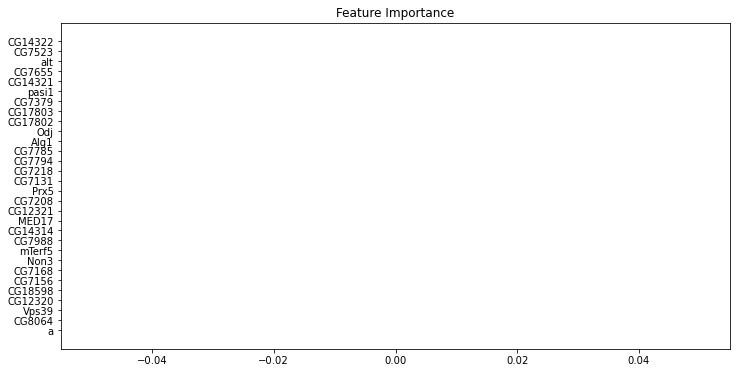

In [107]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[:30]
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')